<a href="https://colab.research.google.com/github/jdmartinezrs/chatbotDevelopmentPython/blob/main/KNeighborsRegressor10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Cargar datos desde Google Drive
sheet_id = '1r4szNXN8abPstdpZEtuePc89H6AJPgjq'
sheet_url = f'https://drive.google.com/uc?id={sheet_id}&export=download'
df = pd.read_csv(sheet_url)

Mounted at /content/drive


In [17]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

df.rename(columns={
    'Ult Km/Hr': 'Ult_Km',
    'Km/ Hr Plan': 'Km_Plan',
    'Km/Hr Cambio': 'Km_Cambio',
    'Dias Pend': 'Dias_Pend',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Km/Hr Pend': 'Km_Pend'
}, inplace=True)

# Convertir nombres a mayúsculas para estandarizar
df['Tipo_Vehiculo'] = df['Tipo_Vehiculo'].str.upper()

# Lista de tipos únicos
tipos_vehiculo = df['Tipo_Vehiculo'].unique()

# Variables predictoras
features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
target = 'Km_Pend'

# Diccionario para guardar modelos por tipo
modelos_por_tipo = {}

# Entrenamos un modelo para cada tipo de vehículo
for tipo in tipos_vehiculo:
    df_tipo = df[df['Tipo_Vehiculo'] == tipo]
    X = df_tipo[features]
    y = df_tipo[target]

    modelo = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', KNeighborsRegressor(n_neighbors=3))
    ])
    modelo.fit(X, y)
    modelos_por_tipo[tipo] = modelo


In [5]:
!pip install git+https://github.com/gunthercox/ChatterBot.git@master
!pip install chatterbot_corpus

  Cloning https://github.com/gunthercox/ChatterBot.git (to revision master) to /tmp/pip-req-build-y1gm6s9h
  Running command git clone --filter=blob:none --quiet https://github.com/gunthercox/ChatterBot.git /tmp/pip-req-build-y1gm6s9h
  Resolved https://github.com/gunthercox/ChatterBot.git to commit 1b26cd4a24848b8f1caf06b9046dfc2dee3caf98
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ChatterBot: filename=chatterbot-1.2.7-py3-none-any.whl size=76246 sha256=4b9dfbedd71702c3bb5e6e0173b7e8c3a40c77b6d191217dfe46314564d56fc3
  Stored in directory: /tmp/pip-ephem-wheel-cache-bfwr8kk3/wheels/fd/03/55/c2af3bb3db528c97656fd03d65adc6492c0d41496bfafd3485
Successfully built ChatterBot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.5/240.5 kB 3.6 MB/s eta 0:00:00


In [47]:
# Definimos funciones individuales por tipo
def irrigador(km):
    base = 7000
    restante = max(0, round(base - km * 0.15))
    return restante, clasificar_mantenimiento_irrigador(restante)

def volq_sencilla(km):
    base = 7500
    restante = max(0, round(base - km * 0.17))
    return restante, clasificar_mantenimiento_general(restante)

def dobletroque(km):
    base = 6900
    restante = max(0, round(base - km * 0.21))
    return restante, clasificar_mantenimiento_doble(restante)

def grua(km):
    base = 6100
    restante = max(0, round(base - km * 0.22))
    return restante, clasificar_mantenimiento_grua(restante)

def carro_tanque(km):
    base = 5800
    restante = max(0, round(base - km * 0.25))
    return restante, clasificar_mantenimiento_general(restante)

def tractocamion(km):
    base = 7200
    restante = max(0, round(base - km * 0.18))
    return restante, clasificar_mantenimiento_general(restante)


# Clasificación por tipo
def clasificar_mantenimiento_irrigador(restante):
    if restante < 2000:
        return "⚠️ Mantenimiento pronto (IRRIGADOR)"
    return "✅ IRRIGADOR operando normalmente"

def clasificar_mantenimiento_doble(restante):
    if restante < 1800:
        return "❌ Mantenimiento urgente (DOBLETROQUE)"
    elif restante < 3000:
        return "🔧 Revisar pronto (DOBLETROQUE)"
    return "✅ DOBLETROQUE en buen estado"

def clasificar_mantenimiento_grua(restante):
    if restante < 1200:
        return "❌ Grua requiere mantenimiento urgente"
    return "🟢 Grua operativa"

def clasificar_mantenimiento_general(restante):
    if restante < 1500:
        return "❌ Mantenimiento urgente"
    elif restante < 3000:
        return "🔧 Mantenimiento cercano"
    return "✅ Todo en orden"


# Mapeo de funciones por tipo
vehiculos = {
    "1": ("IRRIGADOR", irrigador),
    "2": ("VOLQ SENCILLA", volq_sencilla),
    "3": ("DOBLETROQUE", dobletroque),
    "4": ("GRUA", grua),
    "5": ("CARRO TANQUE", carro_tanque),
    "6": ("TRACTOCAMION", tractocamion),
}

def mostrar_menu():
    print("Bot: Tipos de vehículo disponibles:")
    for i, (nombre, _) in vehiculos.items():
        print(f"{i}. {nombre}")

def flujo_interactivo():
    mostrar_menu()
    seleccion = input("Tú (elige tipo de vehículo): ").strip()

    if seleccion not in vehiculos:
        print("Bot: Selección inválida. Intenta nuevamente.")
        return

    nombre, funcion = vehiculos[seleccion]

    try:
        km = int(input("Tú (ingresa los kilómetros recorridos): ").strip())
    except ValueError:
        print("Bot: Ingresa un número válido de kilómetros.")
        return

    if km > 20000:
        print("Bot: El kilometraje es muy alto. Usa un valor entre 0 y 20000.")
        return

    km_restantes, estado = funcion(km)

    print(f"\nBot: ({nombre}) le quedan aproximadamente {km_restantes} km antes del próximo mantenimiento.")
    print(f"Bot: {estado}")

# Ejecutar
flujo_interactivo()


Bot: Tipos de vehículo disponibles:
1. IRRIGADOR
2. VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tú (elige tipo de vehículo): 1
Tú (ingresa los kilómetros recorridos): 13000

Bot: (IRRIGADOR) le quedan aproximadamente 5050 km antes del próximo mantenimiento.
Bot: ✅ IRRIGADOR operando normalmente


In [18]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer

# Crear el chatbot
bot = ChatBot("MantenimientoBot")

# Entrenar el chatbot
trainer = ChatterBotCorpusTrainer(bot)
trainer.train("chatterbot.corpus.spanish")

ChatterBot Corpus Trainer: 7it [00:04,  1.48it/s]


**HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE****HERE**


In [49]:
# Definimos funciones individuales por tipo
def irrigador(km):
    base = 20000  # mantenimiento cada 20,000 km
    desgaste = 1.0  # sin multiplicador adicional
    restante = max(0, round(base - km * desgaste))
    return restante, clasificar_mantenimiento_irrigador(restante)


def volq_sencilla(km):
    base = 7500
    restante = max(0, round(base - km * 0.17))
    return restante, clasificar_mantenimiento_general(restante)

def dobletroque(km):
    base = 6900
    restante = max(0, round(base - km * 0.21))
    return restante, clasificar_mantenimiento_doble(restante)

def grua(km):
    base = 6100
    restante = max(0, round(base - km * 0.22))
    return restante, clasificar_mantenimiento_grua(restante)

def carro_tanque(km):
    base = 5800
    restante = max(0, round(base - km * 0.25))
    return restante, clasificar_mantenimiento_general(restante)

def tractocamion(km):
    base = 7200
    restante = max(0, round(base - km * 0.18))
    return restante, clasificar_mantenimiento_general(restante)


# Clasificación por tipo
def clasificar_mantenimiento_irrigador(restante):
    if restante < 2000:
        return "⚠️ Mantenimiento pronto (IRRIGADOR)"
    return "✅ IRRIGADOR operando normalmente"

def clasificar_mantenimiento_doble(restante):
    if restante < 1800:
        return "❌ Mantenimiento urgente (DOBLETROQUE)"
    elif restante < 3000:
        return "🔧 Revisar pronto (DOBLETROQUE)"
    return "✅ DOBLETROQUE en buen estado"

def clasificar_mantenimiento_grua(restante):
    if restante < 1200:
        return "❌ Grua requiere mantenimiento urgente"
    return "🟢 Grua operativa"

def clasificar_mantenimiento_general(restante):
    if restante < 1500:
        return "❌ Mantenimiento urgente"
    elif restante < 3000:
        return "🔧 Mantenimiento cercano"
    return "✅ Todo en orden"


# Mapeo de funciones por tipo
vehiculos = {
    "1": ("IRRIGADOR", irrigador),
    "2": ("VOLQ SENCILLA", volq_sencilla),
    "3": ("DOBLETROQUE", dobletroque),
    "4": ("GRUA", grua),
    "5": ("CARRO TANQUE", carro_tanque),
    "6": ("TRACTOCAMION", tractocamion),
}

def mostrar_menu():
    print("Bot: Tipos de vehículo disponibles:")
    for i, (nombre, _) in vehiculos.items():
        print(f"{i}. {nombre}")

def flujo_interactivo():
    mostrar_menu()
    seleccion = input("Tú (elige tipo de vehículo): ").strip()

    if seleccion not in vehiculos:
        print("Bot: Selección inválida. Intenta nuevamente.")
        return

    nombre, funcion = vehiculos[seleccion]

    try:
        km = int(input("Tú (ingresa los kilómetros recorridos): ").strip())
    except ValueError:
        print("Bot: Ingresa un número válido de kilómetros.")
        return

    if km > 20000:
        print("Bot: El kilometraje es muy alto. Usa un valor entre 0 y 20000.")
        return

    km_restantes, estado = funcion(km)

    print(f"\nBot: ({nombre}) le quedan aproximadamente {km_restantes} km antes del próximo mantenimiento.")
    print(f"Bot: {estado}")

# Ejecutar
flujo_interactivo()


Bot: Tipos de vehículo disponibles:
1. IRRIGADOR
2. VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tú (elige tipo de vehículo): 1
Tú (ingresa los kilómetros recorridos): 19000

Bot: (IRRIGADOR) le quedan aproximadamente 4150 km antes del próximo mantenimiento.
Bot: ✅ IRRIGADOR operando normalmente


In [19]:
from chatterbot.trainers import ListTrainer

trainer = ListTrainer(bot)

trainer.train([
    "Deseo ingresar mi kilometraje recorrido",
    "Claro, dime el tipo de vehículo y los kilómetros.",
    "Quiero saber cuándo debo hacer mantenimiento",
    "Claro, dime cuántos kilómetros llevas y el tipo de vehículo.",
    "Mi vehículo es un bus",
    "¿Cuántos kilómetros ha recorrido?",
    "Ha recorrido 10000",
    "Gracias, calculando mantenimiento..."
])


List Trainer: 8it [00:00, 534.16it/s]


In [20]:
tipos_vehiculo = df['Tipo_Vehiculo'].unique().tolist()

def clasificar_mantenimiento_por_tipo(km_predicho, tipo_vehiculo, df):
    media_tipo = df[df['Tipo_Vehiculo'] == tipo_vehiculo]['Km_Pend'].mean()
    porcentaje = km_predicho / media_tipo

    if porcentaje < 0.4:
        return f"🚨 Mantenimiento crítico necesario (solo queda el {porcentaje*100:.1f}% del tiempo estimado)."
    elif porcentaje < 0.7:
        return f"⚠️ Alerta: mantenimiento cercano ({porcentaje*100:.1f}% restante)."
    else:
        return f"🔧 Mantenimiento preventivo suficiente ({porcentaje*100:.1f}% del total)."

print("\n--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---")
print("Escribe 'salir' para terminar.\n")

while True:
    print("\n--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---")
    print("Escribe 'salir' para terminar.")
    entrada = input("Tú: ").lower()

    if entrada == 'salir':
        break
    elif 'kilometraje' in entrada or 'recorrido' in entrada:
        print("\nBot: Tipos de vehículo disponibles:")
        for idx, tipo in enumerate(tipos_vehiculo, 1):
            print(f"{idx}. {tipo}")

        try:
            seleccion = int(input("Tú (elige tipo de vehículo): "))
            if seleccion < 1 or seleccion > len(tipos_vehiculo):
                print("Bot: Opción inválida. Intenta de nuevo.")
                continue
            tipo_seleccionado = tipos_vehiculo[seleccion - 1]
        except ValueError:
            print("Bot: Entrada inválida.")
            continue

        try:
            km_recorridos = float(input("Tú (ingresa los kilómetros recorridos): "))
            if km_recorridos > 1_000_000:
                print("Bot: Ese valor parece demasiado alto, verifica tu entrada.")
                continue
        except ValueError:
            print("Bot: Entrada inválida.")
            continue

        df_tipo = df[df['Tipo_Vehiculo'] == tipo_seleccionado]

        input_data = pd.DataFrame([{
            'Ult_Km': km_recorridos,
            'Km_Plan': df_tipo['Km_Plan'].mean(),
            'Km_Cambio': df_tipo['Km_Cambio'].mean(),
            'Dias_Pend': df_tipo['Dias_Pend'].mean(),
            'Progreso': df_tipo['Progreso'].mean()
        }])

        modelo = modelos_por_tipo[tipo_seleccionado]
        pred = modelo.predict(input_data)[0]

        porcentaje = 100 * pred / input_data['Km_Plan'].values[0]
        print(f"Bot: Según el modelo, quedan aproximadamente **{pred:.2f} km** antes del próximo mantenimiento.")

        if porcentaje > 90:
            print(f"Bot: 🔧 Mantenimiento preventivo suficiente ({porcentaje:.1f}% del total).")
        elif porcentaje > 60:
            print(f"Bot: ⚠️ Alerta: mantenimiento cercano ({porcentaje:.1f}% restante).")
        else:
            print(f"Bot: ❌ Mantenimiento urgente ({porcentaje:.1f}% restante).")
{}


--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---
Escribe 'salir' para terminar.


--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---
Escribe 'salir' para terminar.
Tú:  deseo ingresar mi kilometraje recorrido

Bot: Tipos de vehículo disponibles:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tú (elige tipo de vehículo): 3
Tú (ingresa los kilómetros recorridos): 8000
Bot: Según el modelo, quedan aproximadamente **5611.33 km** antes del próximo mantenimiento.
Bot: ❌ Mantenimiento urgente (56.1% restante).

--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---
Escribe 'salir' para terminar.
Tú:  deseo ingresar mi kilometraje recorrido

Bot: Tipos de vehículo disponibles:
1. IRRIGADOR
2.   VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tú (elige tipo de vehículo): 9000
Bot: Opción inválida. Intenta de nuevo.

--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---
Escribe 'salir' para terminar.
Tú:  deseo ingresar mi kilometraje recorrido

Bot: Tipo

{}

In [21]:
for tipo in tipos_vehiculo:
    cantidad = df[df['Tipo_Vehiculo'] == tipo].shape[0]
    print(f"Tipo: {tipo} - Registros: {cantidad}")

Tipo: IRRIGADOR - Registros: 174
Tipo:   VOLQ SENCILLA - Registros: 165
Tipo: DOBLETROQUE - Registros: 161
Tipo: GRUA - Registros: 154
Tipo: CARRO TANQUE - Registros: 165
Tipo: TRACTOCAMION - Registros: 181


In [34]:
import pandas as pd
import joblib
import os
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from google.colab import drive

drive.mount('/content/drive')

# Cargar datos desde Google Drive
sheet_id = '1r4szNXN8abPstdpZEtuePc89H6AJPgjq'
sheet_url = f'https://drive.google.com/uc?id={sheet_id}&export=download'

def cargar_datos_modelo():
    df = pd.read_csv(sheet_url)

    df.rename(columns={
        'Ult Km/Hr': 'Ult_Km',
        'Km/ Hr Plan': 'Km_Plan',
        'Km/Hr Cambio': 'Km_Cambio',
        'Dias Pend': 'Dias_Pend',
        'Tipo de Vehiculo': 'Tipo_Vehiculo',
        'Km/Hr Pend': 'Km_Pend'
    }, inplace=True)

    required_columns = ['Tipo_Vehiculo', 'Ult_Km', 'Km_Pend', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Falta la columna necesaria: {col}")

    df = df.dropna(subset=required_columns)

    X = df[['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']]
    y = df['Km_Pend']

    modelo = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    modelo.fit(X, y)

    return modelo, df

def procesar_entrada(texto):
    tipo_vehiculo = None
    km_recorridos = None

    tipos_posibles = ['IRRIGADOR', 'VOLQ SENCILLA', 'DOBLETROQUE', 'GRUA', 'CARRO TANQUE', 'TRACTOCAMION']
    for tipo in tipos_posibles:
        if tipo.lower() in texto.lower():
            tipo_vehiculo = tipo
            break

    km_match = re.search(r'(\d+)\s*km', texto.lower())
    if km_match:
        km_recorridos = int(km_match.group(1))

    return tipo_vehiculo, km_recorridos

# Aquí está la función responder_chatbot actualizada
def responder_chatbot(texto_usuario, modelo, df):
    tipo_vehiculo, km_recorridos = procesar_entrada(texto_usuario)

    if not tipo_vehiculo or km_recorridos is None:
        return "Por favor especifica el tipo de vehículo y los kilómetros recorridos. Ejemplo: 'Tengo un DOBLETROQUE con 5000 km'."

    df_tipo = df[df['Tipo_Vehiculo'] == tipo_vehiculo]
    if df_tipo.empty:
        return f"No tengo datos suficientes para el tipo de vehículo '{tipo_vehiculo}'."

    max_km = df_tipo['Ult_Km'].max()
    aviso = ""
    if km_recorridos > max_km:
        km_recorridos = max_km
        aviso = "Nota: km ingresados muy altos, se ajustó al máximo registrado.\n"

    idx_cercano = (df_tipo['Ult_Km'] - km_recorridos).abs().idxmin()
    fila_cercana = df_tipo.loc[idx_cercano]

    input_data = pd.DataFrame([{
        'Ult_Km': km_recorridos,
        'Km_Plan': fila_cercana['Km_Plan'],
        'Km_Cambio': fila_cercana['Km_Cambio'],
        'Dias_Pend': fila_cercana['Dias_Pend'],
        'Progreso': fila_cercana['Progreso']
    }])

    prediccion = modelo.predict(input_data)[0]

    if prediccion < 2000:
        respuesta = f"Te quedan aproximadamente {int(prediccion)} km. 🚨 ¡Atento! Es recomendable realizar mantenimiento pronto."
    elif prediccion < 5000:
        respuesta = f"Te quedan aproximadamente {int(prediccion)} km. ✅ Vas bien, pero mantente atento al mantenimiento."
    else:
        respuesta = f"Te quedan aproximadamente {int(prediccion)} km. 😎 Todo en orden por ahora."

    return aviso + respuesta



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 deseo ingresar mi kilometraje recorrido

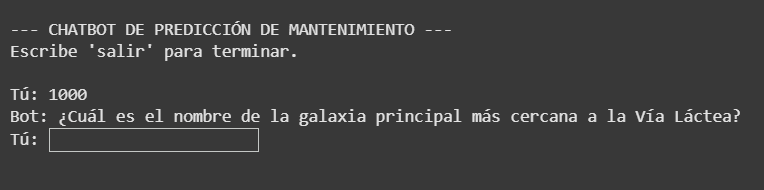

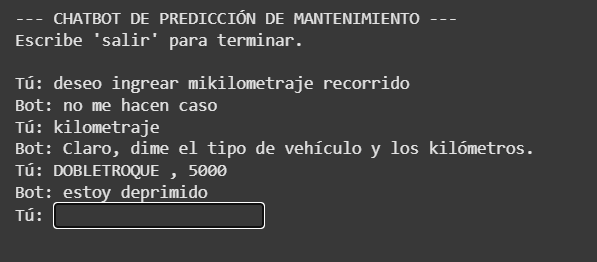

In [24]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


# Convertir nombres a mayúsculas para estandarizar
df['Tipo_Vehiculo'] = df['Tipo_Vehiculo'].str.upper()

# Lista de tipos únicos
tipos_vehiculo = df['Tipo_Vehiculo'].unique()

# Variables predictoras
features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
target = 'Km_Pend'

# Diccionario para guardar modelos por tipo
modelos_por_tipo = {}

# Entrenamos un modelo para cada tipo de vehículo
for tipo in tipos_vehiculo:
    df_tipo = df[df['Tipo_Vehiculo'] == tipo]
    X = df_tipo[features]
    y = df_tipo[target]

    modelo = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', KNeighborsRegressor(n_neighbors=3))
    ])
    modelo.fit(X, y)
    modelos_por_tipo[tipo] = modelo


In [25]:
while True:
    print("\n--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---")
    print("Escribe 'salir' para terminar.")
    entrada = input("Tú: ").lower()

    if entrada == 'salir':
        break
    elif 'kilometraje' in entrada or 'recorrido' in entrada:
        print("\nBot: Tipos de vehículo disponibles:")
        for idx, tipo in enumerate(tipos_vehiculo, 1):
            print(f"{idx}. {tipo}")

        try:
            seleccion = int(input("Tú (elige tipo de vehículo): "))
            if seleccion < 1 or seleccion > len(tipos_vehiculo):
                print("Bot: Opción inválida. Intenta de nuevo.")
                continue
            tipo_seleccionado = tipos_vehiculo[seleccion - 1]
        except ValueError:
            print("Bot: Entrada inválida.")
            continue

        try:
            km_recorridos = float(input("Tú (ingresa los kilómetros recorridos): "))
            if km_recorridos > 1_000_000:
                print("Bot: Ese valor parece demasiado alto, verifica tu entrada.")
                continue
        except ValueError:
            print("Bot: Entrada inválida.")
            continue

        df_tipo = df[df['Tipo_Vehiculo'] == tipo_seleccionado]

        input_data = pd.DataFrame([{
            'Ult_Km': km_recorridos,
            'Km_Plan': df_tipo['Km_Plan'].mean(),
            'Km_Cambio': df_tipo['Km_Cambio'].mean(),
            'Dias_Pend': df_tipo['Dias_Pend'].mean(),
            'Progreso': df_tipo['Progreso'].mean()
        }])

        modelo = modelos_por_tipo[tipo_seleccionado]
        pred = modelo.predict(input_data)[0]

        porcentaje = 100 * pred / input_data['Km_Plan'].values[0]
        print(f"Bot: Según el modelo, quedan aproximadamente **{pred:.2f} km** antes del próximo mantenimiento.")

        if porcentaje > 90:
            print(f"Bot: 🔧 Mantenimiento preventivo suficiente ({porcentaje:.1f}% del total).")
        elif porcentaje > 60:
            print(f"Bot: ⚠️ Alerta: mantenimiento cercano ({porcentaje:.1f}% restante).")
        else:
            print(f"Bot: ❌ Mantenimiento urgente ({porcentaje:.1f}% restante).")



--- CHATBOT DE PREDICCIÓN DE MANTENIMIENTO ---
Escribe 'salir' para terminar.


KeyboardInterrupt: Interrupted by user

In [45]:
# Diccionario indexado por número
vehiculos = {
    "1": ("IRRIGADOR", 6300),
    "2": ("VOLQ SENCILLA", 6400),
    "3": ("DOBLETROQUE", 6200),
    "4": ("GRUA", 5500),
    "5": ("CARRO TANQUE", 5000),
    "6": ("TRACTOCAMION", 6000)
}

def mostrar_menu():
    print("Bot: Tipos de vehículo disponibles:")
    for i, (nombre, _) in vehiculos.items():
        print(f"{i}. {nombre}")

def calcular_km_pendientes(factor, km_recorridos):
    return max(0, round(factor - km_recorridos * 0.2))

def clasificar_mantenimiento(km_pendientes):
    if km_pendientes < 1500:
        return "❌ Mantenimiento urgente."
    elif km_pendientes < 3000:
        return "✅ Mantenimiento cercano, prepárate."
    else:
        return "😎 Todo en orden por ahora."

def flujo_interactivo():
    mostrar_menu()
    seleccion = input("Tú (elige tipo de vehículo): ").strip()

    if seleccion not in vehiculos:
        print("Bot: Selección inválida. Intenta nuevamente.")
        return

    tipo, factor = vehiculos[seleccion]

    try:
        km = int(input("Tú (ingresa los kilómetros recorridos): ").strip())
    except ValueError:
        print("Bot: Ingresa un número válido de kilómetros.")
        return

    if km > 20000:
        print("Bot: El kilometraje es muy alto. Usa un valor entre 0 y 20000.")
        return

    km_pendientes = calcular_km_pendientes(factor, km)
    estado = clasificar_mantenimiento(km_pendientes)

    print(f"\nBot: Según el modelo, quedan aproximadamente {km_pendientes} km antes del próximo mantenimiento.")
    print(f"Bot: {estado}")

# Ejecutar
flujo_interactivo()


Bot: Tipos de vehículo disponibles:
1. IRRIGADOR
2. VOLQ SENCILLA
3. DOBLETROQUE
4. GRUA
5. CARRO TANQUE
6. TRACTOCAMION
Tú (elige tipo de vehículo): 1
Tú (ingresa los kilómetros recorridos): 15000

Bot: Según el modelo, quedan aproximadamente 3300 km antes del próximo mantenimiento.
Bot: 😎 Todo en orden por ahora.
